In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [9]:
# Get table schema
measurements_schema = session.query(measurements)
measurements_schema.__dict__

{'session': <sqlalchemy.orm.session.Session at 0x7fcd1c336a30>,
 '_propagate_attrs': immutabledict({'compile_state_plugin': 'orm', 'plugin_subject': <Mapper at 0x7fcd1c30f430; measurement>}),
 '_raw_columns': [Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)]}

In [10]:
# Find the most recent date in the data set.
#engine.execute('SELECT * FROM measurement order by date desc LIMIT 10').fetchall()
latestDate = session.query(func.max(measurements.date)).first()
latestDate

('2017-08-23',)

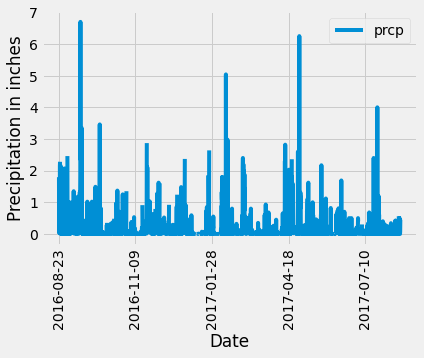

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Calculate the date one year from the last date in data set.
lastYearDate = dt.date(2017,8,23) - dt.timedelta(days=365)
#lastYearDate = dt.date(latestDate.replace('-','').apply(int)) - dt.timedelta(days=365
#lastYearDate

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurements.id, measurements.date, measurements.prcp, measurements.tobs).filter(measurements.date >= lastYearDate).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
resultsDF = pd.DataFrame(results)
#resultsDF.head(5)

# Sort the dataframe by date
results_sortedDF = resultsDF.sort_values("date")
results_sortedDF.head()

# Use Pandas Plotting with Matplotlib to plot the data
results_sortedDF.plot(x="date", y="prcp", rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation in inches")
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_sortedDF.describe()


,id,prcp,tobs
count,2230.000000,2021.000000,2230.000000
mean,10158.570404,0.177279,74.590583
std,5603.500203,0.461190,4.611667
min,2364.000000,0.000000,58.000000
25%,5287.250000,0.000000,72.000000
50%,8930.500000,0.020000,75.000000
75%,14750.750000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


# Exploratory Station Analysis

In [13]:
# Get table schema
stations_schema = session.query(stations)
stations_schema.__dict__

{'session': <sqlalchemy.orm.session.Session at 0x7fcd1c336a30>,
 '_propagate_attrs': immutabledict({'compile_state_plugin': 'orm', 'plugin_subject': <Mapper at 0x7fcd1b950df0; station>}),
 '_raw_columns': [Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)]}

In [14]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(stations.station)).all()


[(9,)]

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
stations = session.query(measurements.station, func.count(measurements.station)).\
                        group_by(measurements.station).\
                        order_by(func.count(measurements.station).desc()).all()
stations
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#engine.execute('SELECT * FROM station').fetchall()
session.query(func.max(measurements.tobs), func.avg(measurements.tobs), func.min(measurements.tobs)) .\
              filter(measurements.station == 'USC00519281').all()
              

[(85.0, 71.66378066378067, 54.0)]

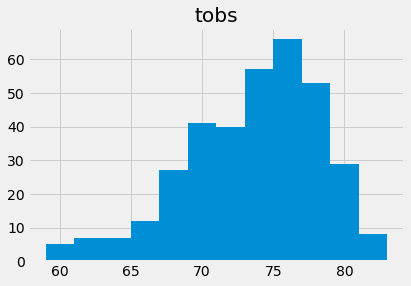

In [34]:
# Using the most active station id
histogramData = session.query(measurements.date, measurements.tobs).filter(measurements.date >= lastYearDate, measurements.station == 'USC00519281').all()
histogramDataDF = pd.DataFrame(histogramData)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogramDataDF.hist(bins=12)
plt.show()


# Close session

In [35]:
# Close Session
session.close()